[*********************100%%**********************]  1 of 1 completed
C:\Users\konak\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.3136
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0423
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0349
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0266
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0230
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0215
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0185
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0150
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0146
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0149
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


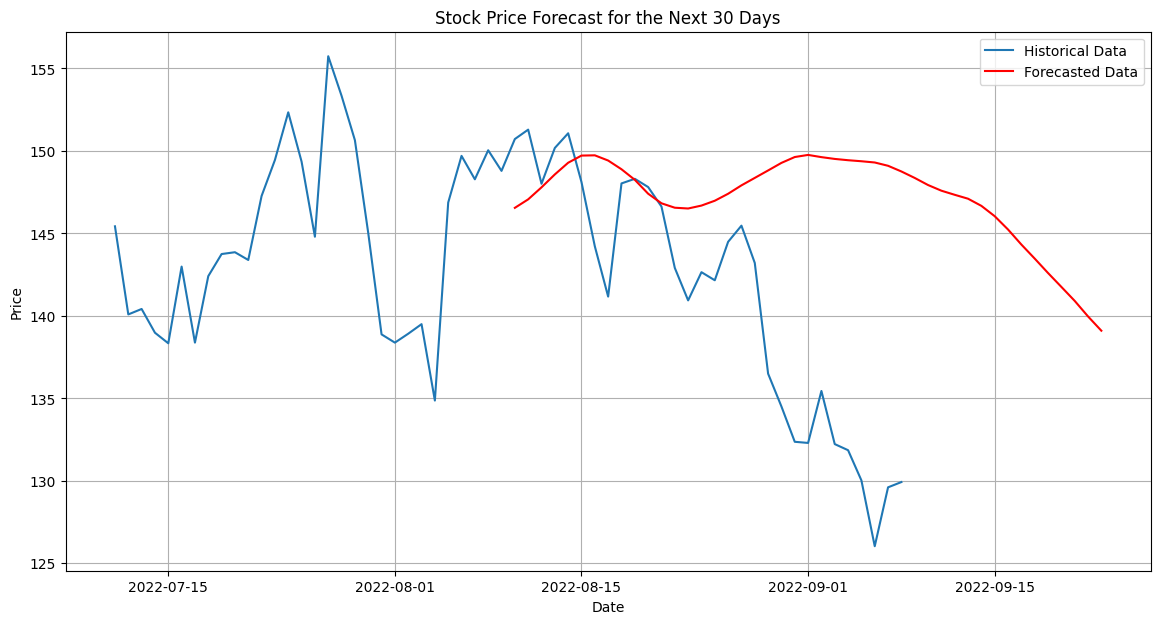

In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Fetch historical stock data
data = yf.download('AAPL', start='2022-01-01', end='2022-12-31')

# Use only the closing price for simplicity
data = data['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# Prepare the data for training
X, y = [], []
for i in range(30, len(data_normalized)):
    X.append(data_normalized[i-30:i, 0])
    y.append(data_normalized[i, 0])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split the data into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)

# Convert data to DataFrame
data_df = pd.DataFrame(data, index=pd.date_range(start='2022-01-01', periods=len(data), freq='D'))

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(data_df.index[-60:], data[-60:], label='Historical Data')
plt.plot(pd.date_range(start=data_df.index[-30], periods=len(y_pred), freq='D'), y_pred, label='Forecasted Data', color='r')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Forecast for the Next 30 Days')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%%**********************]  1 of 1 completed
C:\Users\konak\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 71ms/step - loss: 0.1559
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0387
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0203
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 897ms/step


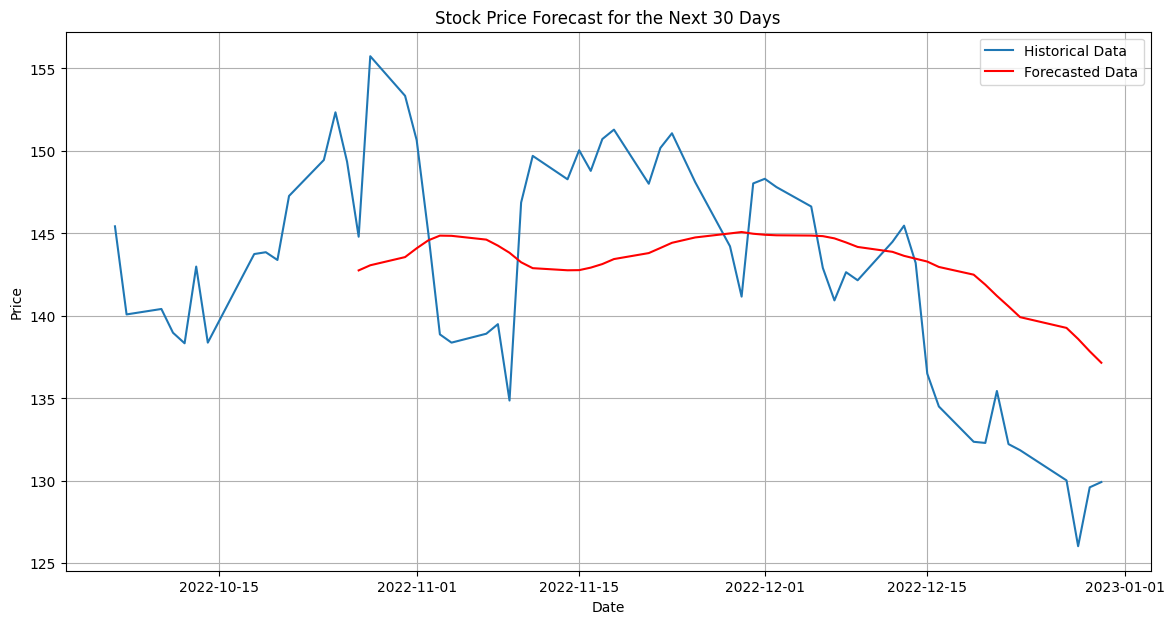

In [26]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Fetch historical stock data
data = yf.download('AAPL', start='2022-01-01', end='2022-12-31')

# Use only the closing price for simplicity
data = data[['Close']].reset_index()

# Normalize the data
scaler = MinMaxScaler()
data['Close_Normalized'] = scaler.fit_transform(data[['Close']])

# Prepare the data for training
X, y = [], []
for i in range(30, len(data)):
    X.append(data['Close_Normalized'][i-30:i])
    y.append(data['Close_Normalized'][i])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split the data into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=3, batch_size=32)

# Make predictions
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(data['Date'][-60:], data['Close'][-60:], label='Historical Data')
plt.plot(data['Date'][-len(y_pred):], y_pred, label='Forecasted Data', color='r')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Forecast for the Next 30 Days')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Fetch historical stock data
data = yf.download('AAPL', start='2022-01-01', end='2022-12-31')

# Use only the closing price for simplicity
data = data[['Close']].reset_index()

# Normalize the data
scaler = MinMaxScaler()
data['Close_Normalized'] = scaler.fit_transform(data[['Close']])

# Prepare the data for training
X, y = [], []
for i in range(30, len(data)):
    X.append(data['Close_Normalized'][i-30:i])
    y.append(data['Close_Normalized'][i])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split the data into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=3, batch_size=32)

# Make predictions for the next 30 days
future_dates = pd.date_range(start='2022-12-31', periods=30)
future_predictions = []

# Use the last 30 days of data for prediction
x_input = X[-30:]
x_input = np.reshape(x_input, (1, 30, 1))

for i in range(30):
    prediction = model.predict(x_input)[0][0]
    future_predictions.append(prediction)
    x_input = np.append(x_input[0][1:], [[prediction]], axis=0)
    x_input = np.reshape(x_input, (1, 30, 1))

# Inverse transform the predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(data['Date'][-60:], data['Close'][-60:], label='Historical Data')
plt.plot(future_dates, future_predictions, label='Forecasted Data', color='r')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Forecast for the Next 30 Days')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%%**********************]  1 of 1 completed
C:\Users\konak\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - loss: 0.2216
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0368
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0291


ValueError: cannot reshape array of size 900 into shape (1,30,1)

In [28]:
import numpy as np
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Function to create a sliding window of data
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:(i + window_size), 0])
        y.append(data[i + window_size, 0])
    return np.array(X), np.array(y)

# Load historical stock data
data = yf.download('AAPL', start='2020-01-01', end='2022-01-01')['Close'].values.reshape(-1, 1)

# Normalize the data
data_normalized = (data - np.min(data)) / (np.max(data) - np.min(data))

# Define the window size for the sliding window
window_size = 30

# Create the dataset
X, y = create_dataset(data_normalized, window_size)

# Reshape X for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(window_size, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=2, batch_size=32)

# Use the model to predict the next day's closing price
last_window = data_normalized[-window_size:].reshape(1, window_size, 1)
prediction = model.predict(last_window)

# Denormalize the prediction
prediction = prediction * (np.max(data) - np.min(data)) + np.min(data)

print("Predicted closing price for the next day:", prediction)


[*********************100%%**********************]  1 of 1 completed
C:\Users\konak\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.1630
Epoch 2/2
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0112
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted closing price for the next day: [[175.24072]]


In [31]:
import numpy as np
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Function to create a sliding window of data
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:(i + window_size), 0])
        y.append(data[i + window_size, 0])
    return np.array(X), np.array(y)

# Load historical stock data
data = yf.download('AAPL', start='2020-01-01', end='2022-01-01')['Close'].values.reshape(-1, 1)

# Normalize the data
data_normalized = (data - np.min(data)) / (np.max(data) - np.min(data))

# Define the window size for the sliding window
window_size = 30

# Create the dataset
X, y = create_dataset(data_normalized, window_size)

# Reshape X for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(window_size, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=2, batch_size=32)

# Use the model to predict the next 30 days' closing prices
last_window = data_normalized[-window_size:].reshape(1, window_size, 1)
predictions = []
for _ in range(30):
    prediction = model.predict(last_window)
    predictions.append(prediction[0, 0])
    prediction = prediction.reshape(1, 1, 1)  # Reshape prediction to match last_window
    last_window = np.append(last_window[:, 1:, :], prediction, axis=1)

# Denormalize the predictions
predictions = np.array(predictions).reshape(-1, 1)
predictions = predictions * (np.max(data) - np.min(data)) + np.min(data)

print("Predicted closing prices for the next 30 days:")
for i, pred in enumerate(predictions, 1):
    print(f"Day {i}: {pred[0]}")


[*********************100%%**********************]  1 of 1 completed
C:\Users\konak\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1479
Epoch 2/2
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0086
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/

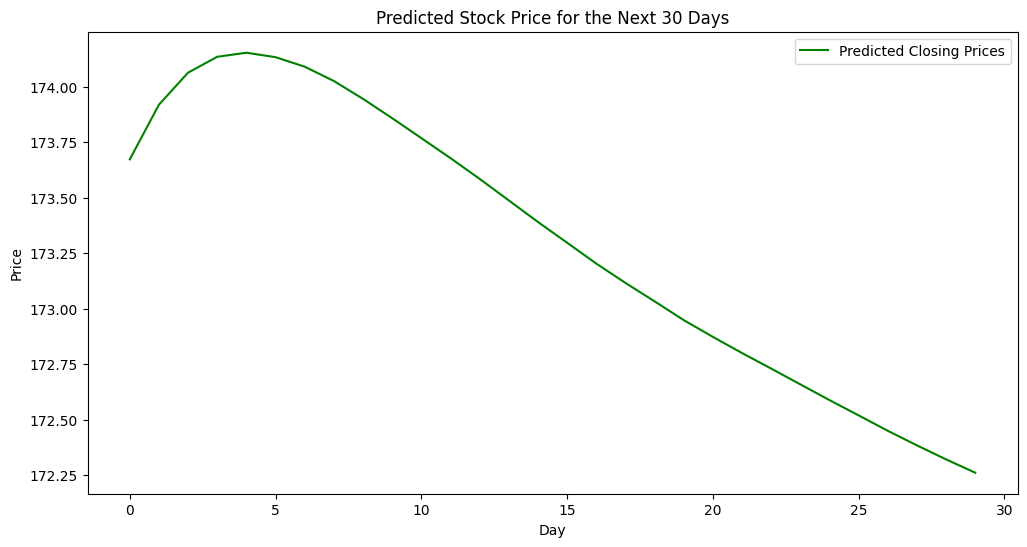

In [34]:
# Plot only the predicted closing prices
plt.figure(figsize=(12, 6))
plt.plot(np.arange(0,len(predictions)), predictions, label='Predicted Closing Prices', color='green')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Predicted Stock Price for the Next 30 Days')
plt.legend()
plt.show()


In [ ]:
from flask import Flask, render_template, request
from flask_ngrok import run_with_ngrok
import numpy as np
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

app = Flask(__name__)
run_with_ngrok(app)  # Start ngrok when app is run

# Function to create a sliding window of data
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:(i + window_size), 0])
        y.append(data[i + window_size, 0])
    return np.array(X), np.array(y)

# Load historical stock data
data = yf.download('AAPL', start='2020-01-01', end='2022-01-01')['Close'].values.reshape(-1, 1)

# Normalize the data
data_normalized = (data - np.min(data)) / (np.max(data) - np.min(data))

# Define the window size for the sliding window
window_size = 30

# Create the dataset
X, y = create_dataset(data_normalized, window_size)

# Reshape X for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(window_size, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=2, batch_size=32)

@app.route('/', methods=['GET', 'POST'])
def index():
    if request.method == 'POST':
        symbol = request.form['symbol']
        if symbol:
            # Download stock data for the symbol
            data = yf.download(symbol, start='2022-01-01', end='2022-03-01')['Close'].values.reshape(-1, 1)
            # Normalize the data
            data_normalized = (data - np.min(data)) / (np.max(data) - np.min(data))
            # Use the model to predict the next 30 days' closing prices
            last_window = data_normalized[-window_size:].reshape(1, window_size, 1)
            predictions = []
            for _ in range(30):
                prediction = model.predict(last_window)
                predictions.append(prediction[0, 0])
                prediction = prediction.reshape(1, 1, 1)  # Reshape prediction to match last_window
                last_window = np.append(last_window[:, 1:, :], prediction, axis=1)
            # Denormalize the predictions
            predictions = np.array(predictions).reshape(-1, 1)
            predictions = predictions * (np.max(data) - np.min(data)) + np.min(data)
            # Format the predictions for display
            prediction_table = "\n".join([f"Day {i + 1}: {pred[0]:.2f}" for i, pred in enumerate(predictions)])
            return render_template('index.html', symbol=symbol, prediction_table=prediction_table)
    return render_template('index.html', symbol='', prediction_table='')

if __name__ == '__main__':
    app.run()


[*********************100%%**********************]  1 of 1 completed

Epoch 1/2



C:\Users\konak\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.1545
Epoch 2/2
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0112
 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
Exception in thread Thread-46:
Traceback (most recent call last):
  File "C:\Users\konak\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\konak\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\util\connection.py", line 85, in create_connection
    raise err
  File "C:\Users\konak\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\util\connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [WinError 10061] No connection could be made because the target machine actively refused it

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\konak\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connectionpool.py", line 793, in urlopen
